<a href="https://colab.research.google.com/github/yolitie/Deep-Learning/blob/main/ForwardPaBatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

torch.Size([100, 1, 28, 28]) torch.Size([100])
epoch1/2,step 100/600, loss= 0.4103
epoch1/2,step 200/600, loss= 0.3359
epoch1/2,step 300/600, loss= 0.3053
epoch1/2,step 400/600, loss= 0.3995
epoch1/2,step 500/600, loss= 0.1343
epoch1/2,step 600/600, loss= 0.1896
epoch2/2,step 100/600, loss= 0.2327
epoch2/2,step 200/600, loss= 0.3703
epoch2/2,step 300/600, loss= 0.3861
epoch2/2,step 400/600, loss= 0.2503
epoch2/2,step 500/600, loss= 0.1058
epoch2/2,step 600/600, loss= 0.1212
accuracy = 9.69


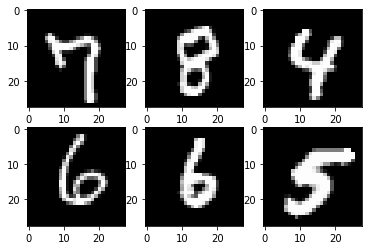

In [4]:
#FEEDFORWARD NN

#MNIST
#Dataloader, Transformation
#Multilayer Neural Net, activation function
#Loss and optimizer

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#device configuration
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyper parameters
input_size= 784 #images have the size 28x28
hidden_size= 100
num_classes= 10
num_epochs= 2
batch_size= 100
learning_rate=0.001

#MNIST
train_dataset=torchvision.datasets.MNIST(root='./data', train=True,transform=transforms.ToTensor(), download=True )
test_dataset=torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)

test_loader=torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size,shuffle=False)

examples= iter(train_loader)
samples,labels=examples.next()
print(samples.shape,labels.shape)

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0],cmap='gray')
#plt.show()

#we create a class NeuralNet that has to be derived from nn.Module and we have to define the init and forward method
#init hS To have itself, the input hidden and output sizes, being the output size the number of classes 
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1= nn.Linear(input_size,hidden_size)
    self.relu= nn.ReLU()
    self.l2=nn.Linear(hidden_size, num_classes)
  
  def forward(self,x):
    out=self.l1(x)
    out= self.relu(out)
    out= self.l2(out)
    return out

model=NeuralNet(input_size, hidden_size, num_classes)

#loss and optimizer
criterion= nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(), lr= learning_rate)

#Training loop
n_total_steps= len(train_loader)
for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_loader):
    #We have to reshape our images first, because if we have 100 1x28x28
    #Our input size is 784
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)

    #forward
    outputs= model(images)
    loss=criterion(outputs,labels)

    #backwards
    optimizer.zero_grad() #to empty the values in the gradient attribute
    loss.backward()
    optimizer.step()

    if (i+1)%100==0:
      print(f'epoch{epoch+1}/{num_epochs},step {i+1}/{n_total_steps}, loss= {loss.item():.4f}')

#Test 
with torch.no_grad():
  n_correct=0
  n_samples=0
  for images, labes in test_loader:
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)
    outputs= model(images)

    #value, index
    _,predictions= torch.max(outputs,1)
    n_samples += labels.shape[0]
    n_correct += (predictions==labels).sum().item()

  acc= 100.0*n_correct/n_samples
  print(f'accuracy = {acc}')

 





